In [4]:
#data manipulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import graphviz


#model algorithm libraries
import sklearn
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
OMP_NUM_THREADS=1

In [5]:
# XGBoost model for affair dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix



In [6]:
# load data
af = pd.read_csv('C:/Users/metini/Desktop/CARDIFFMET/Programming/affairs.csv')


In [7]:
#separate dataframe for independent variables
independent_variables =['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb' ]
X = af[independent_variables]

print (type(X))
print (X)

#create series of target variable 
target_variable ='affair' 
y = af[target_variable]

print (type(y))
print (y)

#convert to numpy array
X_numpy = np.array(X)
y_numpy = np.array(y)

print (type(X_numpy))
print (type(y_numpy))

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
    X_numpy, y_numpy, test_size=0.20, random_state=1,)

<class 'pandas.core.frame.DataFrame'>
      rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0                 3  32.0          9.0       3.0          3    17           2   
1                 3  27.0         13.0       3.0          1    14           3   
2                 4  22.0          2.5       0.0          1    16           3   
3                 4  37.0         16.5       4.0          3    16           5   
4                 5  27.0          9.0       1.0          1    14           3   
...             ...   ...          ...       ...        ...   ...         ...   
6361              5  32.0         13.0       2.0          3    17           4   
6362              4  32.0         13.0       1.0          1    16           5   
6363              5  22.0          2.5       0.0          2    14           3   
6364              5  32.0          6.0       1.0          3    14           3   
6365              4  22.0          2.5       0.0          2    16      

In [8]:
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [9]:
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.26139	validation_0-logloss:0.61903	validation_1-error:0.28650	validation_1-logloss:0.62655


C:\Users\metini\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-error:0.25589	validation_0-logloss:0.57824	validation_1-error:0.28258	validation_1-logloss:0.58984
[2]	validation_0-error:0.25550	validation_0-logloss:0.55461	validation_1-error:0.27786	validation_1-logloss:0.56802
[3]	validation_0-error:0.25079	validation_0-logloss:0.53793	validation_1-error:0.28022	validation_1-logloss:0.55727
[4]	validation_0-error:0.24804	validation_0-logloss:0.52639	validation_1-error:0.27865	validation_1-logloss:0.54962
[5]	validation_0-error:0.24745	validation_0-logloss:0.51813	validation_1-error:0.27472	validation_1-logloss:0.54415
[6]	validation_0-error:0.24588	validation_0-logloss:0.51250	validation_1-error:0.26923	validation_1-logloss:0.54070
[7]	validation_0-error:0.24627	validation_0-logloss:0.50793	validation_1-error:0.27394	validation_1-logloss:0.54035
[8]	validation_0-error:0.24489	validation_0-logloss:0.50407	validation_1-error:0.26845	validation_1-logloss:0.53840
[9]	validation_0-error:0.24254	validation_0-logloss:0.50170	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=0, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

#save model
import pickle
pickle.dump(model, open("xgboost_model.p", "wb" ))


[0]	validation_0-error:0.26119	validation_0-logloss:0.61910	validation_1-error:0.28807	validation_1-logloss:0.62672
[1]	validation_0-error:0.25628	validation_0-logloss:0.57817	validation_1-error:0.28336	validation_1-logloss:0.59019
[2]	validation_0-error:0.25628	validation_0-logloss:0.55407	validation_1-error:0.28022	validation_1-logloss:0.56938
[3]	validation_0-error:0.25020	validation_0-logloss:0.53773	validation_1-error:0.28336	validation_1-logloss:0.55865
[4]	validation_0-error:0.24823	validation_0-logloss:0.52694	validation_1-error:0.28493	validation_1-logloss:0.55029
[5]	validation_0-error:0.24646	validation_0-logloss:0.51784	validation_1-error:0.28022	validation_1-logloss:0.54523
[6]	validation_0-error:0.24391	validation_0-logloss:0.51156	validation_1-error:0.27551	validation_1-logloss:0.54187
[7]	validation_0-error:0.24332	validation_0-logloss:0.50712	validation_1-error:0.27865	validation_1-logloss:0.54074
[8]	validation_0-error:0.24175	validation_0-logloss:0.50294	validation_1

In [11]:

# predictions for train data
print("Making predictions for the following in train set:")
y_p = model.predict(X_train[0:20])
prediction = [round(value) for value in y_p]
true_values=y_test[0:20]
print(prediction)
training_accuracy=accuracy_score(true_values, prediction, normalize=False)
print("Accuracy Score in Training set", training_accuracy)

# predictions for test data
print("Making predictions for the following in test set:")
y_pred = model.predict(X_test[0:20])
predictions = [round(value) for value in y_pred]
print(predictions)
training_accuracy=accuracy_score(true_values, predictions, normalize=False)
print("Accuracy Score in Testing set", training_accuracy)

Making predictions for the following in train set:
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]
Accuracy Score in Training set 15
Making predictions for the following in test set:
[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
Accuracy Score in Testing set 13


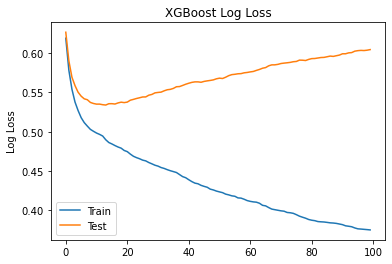

In [12]:
# evaluate predictions
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

fig, af = plt.subplots()
af.plot(x_axis, results['validation_0']['logloss'], label='Train')
af.plot(x_axis, results['validation_1']['logloss'], label='Test')
af.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

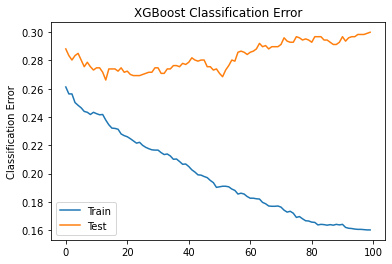

In [13]:
# plot classification error
fig, af = plt.subplots()
af.plot(x_axis, results['validation_0']['error'], label='Train')
af.plot(x_axis, results['validation_1']['error'], label='Test')
af.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

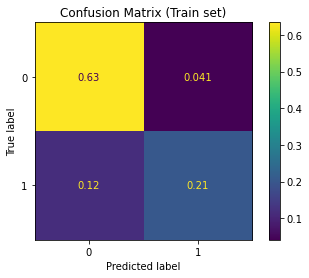

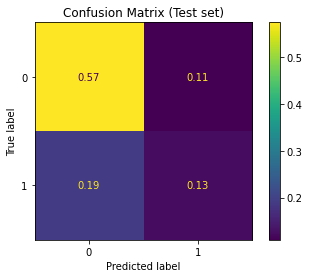

In [14]:
#Plot the confusion matrix for training data using percentage
plot_confusion_matrix(model, X_train, y_train, normalize="all")
plt.savefig('con_trainnum.png')
plt.title('Confusion Matrix (Train set)')
plt.show()

#Plot the confusion matrix for testing data using percentage
plot_confusion_matrix(model, X_test, y_test,normalize="all")
plt.savefig('con_testnum.png')
plt.title('Confusion Matrix (Test set)')
plt.show()

In [15]:

# Average training error
from sklearn.metrics import accuracy_score
training_accuracy=accuracy_score(y_train, model.predict(X_train))
print("Average Train accuracy ", training_accuracy)

testing_accuracy=accuracy_score(y_test, model.predict(X_test))
print("Average Testing accuracy ", testing_accuracy)


Average Train accuracy  0.8397486252945797
Average Testing accuracy  0.7001569858712716
